# Sentiment Analysis (Section - 2)

### DSCI6003_and_DSCI6004 Final Project

#### Author : Srini Ananthakrishnan
#### Date    : 12/15/2016

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
import pre_processing as pp
import sentiment_analysis as sa

In [4]:
TRUE = 1
FALSE = 0

In [5]:
# Reviews file
REVIEWS_FILE = 'music_reviews.json'

## Step 1: Data Exploration
Understand data --> Binarize class --> Explore

### Load reviews into data frame

In [6]:
df = pp.load_jason_file_to_df(REVIEWS_FILE)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


### Binarize the class

In [7]:
df['sentiment'] = df.overall.apply(sa.binarize_overall)

In [8]:
X = df['reviewText'].values
y = df['sentiment'].values

## Step 2: Pre-processing
**Split data(Test/Train) --> TF-IDF (Vectorize)**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43353,), (21353,), (43353,), (21353,))

#### TF-IDF vectorize

In [11]:
X_train, X_test = sa.tfidf_vectorize(X_train, X_test)

done in 0.000001s at 45458915328.000MB/s
n_samples: 43353, n_features: 2172202

Extracting features from the test data using the same vectorizer
done in 18.483762s at 1155.230MB/s
n_samples: 21353, n_features: 2172202

(43353, 2172202) (21353, 2172202)


In [12]:
results = []

## Step 3: Fit Models (with Hyper-param tunning) and evaluate
Fit different classification models (with tunned hyper-parameters) and evaluate

### Random Forest Classifier

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
train time: 21.764s
test time:  49.040s
accuracy:   0.806
classification report:
             precision    recall  f1-score   support

        POS       0.00      0.00      0.00      4153
        NEG       0.81      1.00      0.89     17200

avg / total       0.65      0.81      0.72     21353

confusion matrix:
[[    0  4153]
 [    0 17200]]



/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


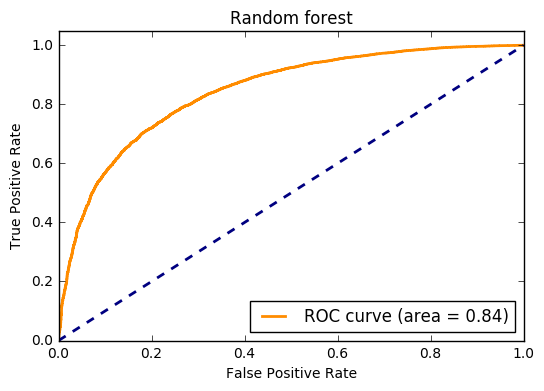

In [13]:
print('=' * 80)
title = 'Random forest'
print(title)
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=6,
                             n_jobs=-1,
                             random_state=1)
results.append(sa.classify(clf, X_train, X_test, y_train, y_test, title, TRUE))

### LinearSVC / SGDC Classifier (L2 and L1)

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.001, verbose=0)


/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/svm/classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 7.951s
test time:  0.026s
accuracy:   0.882
dimensionality: 2172202
density: 1.000000
clf.coef_:
 [[-0.05575501  0.00266117  0.00157173 ..., -0.02341089 -0.08812046
  -0.04427138]]
classification report:
             precision    recall  f1-score   support

        POS       0.81      0.52      0.63      4153
        NEG       0.89      0.97      0.93     17200

avg / total       0.88      0.88      0.87     21353

confusion matrix:
[[ 2150  2003]
 [  507 16693]]



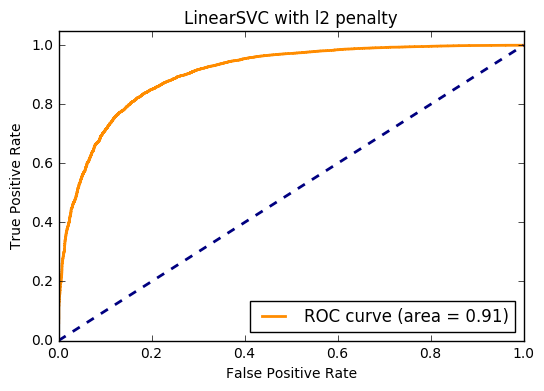

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 8.790s
test time:  0.057s
accuracy:   0.827
dimensionality: 2172202
density: 0.597449
clf.coef_:
 [[-0.02064118  0.          0.         ..., -0.01819772 -0.02349973
  -0.03531945]]
classification report:
             precision    recall  f1-score   support

        POS       0.96      0.12      0.21      4153
        NEG       0.82      1.00      0.90     17200

avg / total       0.85      0.83      0.77     21353

confusion matrix:
[[  482  3671]
 [   19 17181]]



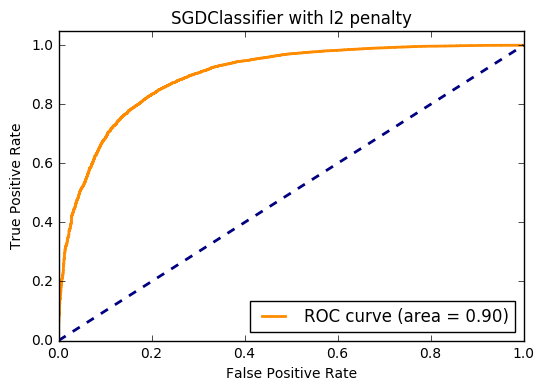

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l1', random_state=None, tol=0.001, verbose=0)


/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/svm/classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 12.180s
test time:  0.045s
accuracy:   0.879
dimensionality: 2172202
density: 0.002020
clf.coef_:
 [[ 0.  0.  0. ...,  0.  0.  0.]]
classification report:
             precision    recall  f1-score   support

        POS       0.75      0.57      0.65      4153
        NEG       0.90      0.95      0.93     17200

avg / total       0.87      0.88      0.87     21353

confusion matrix:
[[ 2370  1783]
 [  807 16393]]



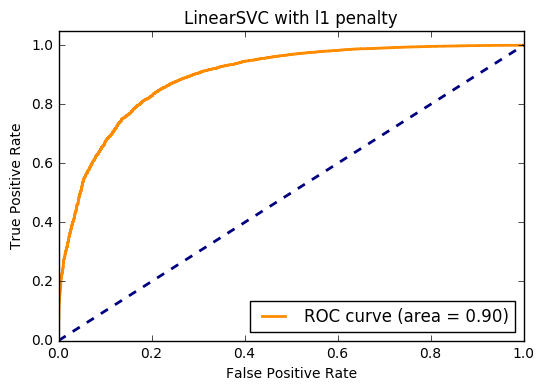

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 16.836s
test time:  0.027s
accuracy:   0.828
dimensionality: 2172202
density: 0.000076
clf.coef_:
 [[ 0.  0.  0. ...,  0.  0.  0.]]
classification report:
             precision    recall  f1-score   support

        POS       0.82      0.15      0.25      4153
        NEG       0.83      0.99      0.90     17200

avg / total       0.83      0.83      0.78     21353

confusion matrix:
[[  621  3532]
 [  136 17064]]



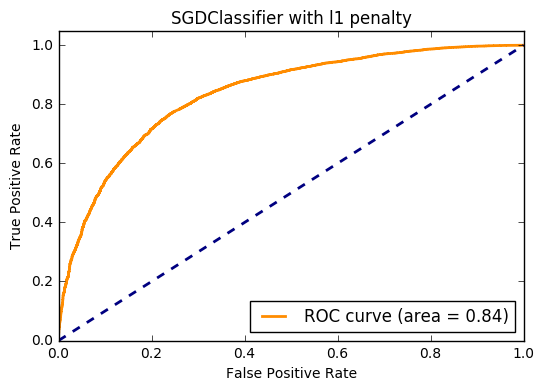

In [14]:
for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    title = 'LinearSVC with '+penalty+' penalty'
    results.append(sa.classify(LinearSVC(loss='l2', penalty=penalty,
                                            dual=False, tol=1e-3), 
                                            X_train, X_test, 
                                            y_train, y_test, title, FALSE))

    # Train SGD model
    title = 'SGDClassifier with '+penalty+' penalty'
    results.append(sa.classify(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty), 
                                           X_train, X_test, 
                                           y_train, y_test, title, FALSE))

### SGD with Elastic Net Classifier

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 10.124s
test time:  0.027s
accuracy:   0.814
dimensionality: 2172202
density: 0.001570
clf.coef_:
 [[ 0.  0.  0. ...,  0.  0.  0.]]
classification report:
             precision    recall  f1-score   support

        POS       0.97      0.04      0.08      4153
        NEG       0.81      1.00      0.90     17200

avg / total       0.84      0.81      0.74     21353

confusion matrix:
[[  180  3973]
 [    5 17195]]



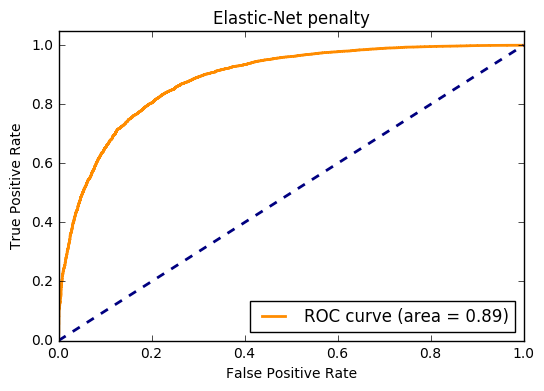

In [15]:
# Train SGD with Elastic Net penalty
print('=' * 80)
title = "Elastic-Net penalty"
print(title)
results.append(sa.classify(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet"), 
                                       X_train, X_test, 
                                       y_train, y_test, title, FALSE))

### Naive Bayes Classifier

Multinomial Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.287s
test time:  0.066s
accuracy:   0.839
dimensionality: 2172202
density: 1.000000
clf.coef_:
 [[-11.29813411 -15.45294103 -15.89630379 ..., -17.53071856 -17.53071856
  -17.53071856]]
classification report:
             precision    recall  f1-score   support

        POS       0.81      0.23      0.35      4153
        NEG       0.84      0.99      0.91     17200

avg / total       0.83      0.84      0.80     21353

confusion matrix:
[[  942  3211]
 [  222 16978]]



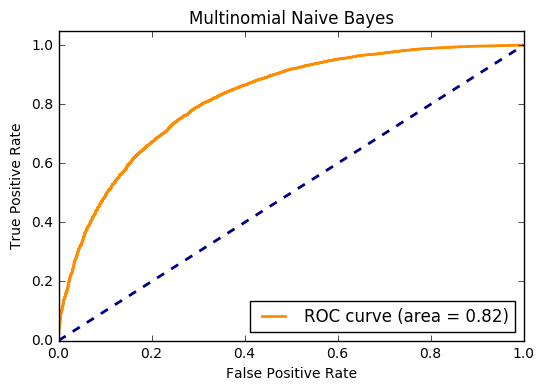

In [16]:
# Train sparse Naive Bayes classifiers
print('=' * 80)
title = "Multinomial Naive Bayes"
print(title)
results.append(sa.classify(MultinomialNB(alpha=.01), X_train, X_test, y_train, y_test, title, TRUE))

Bernoulli Naive Bayes
________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.340s
test time:  0.267s
accuracy:   0.773
dimensionality: 2172202
density: 1.000000
clf.coef_:
 [[ -5.99467797 -10.4507507  -10.4507507  ..., -15.06587121 -15.06587121
  -15.06587121]]
classification report:
             precision    recall  f1-score   support

        POS       0.42      0.46      0.44      4153
        NEG       0.87      0.85      0.86     17200

avg / total       0.78      0.77      0.78     21353

confusion matrix:
[[ 1923  2230]
 [ 2624 14576]]



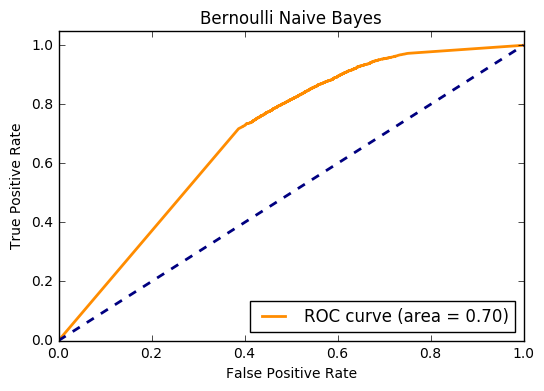

In [17]:
print('=' * 80)
title = "Bernoulli Naive Bayes"
print(title)
results.append(sa.classify(BernoulliNB(alpha=.01), X_train, X_test, y_train, y_test, title, TRUE))

### Linear SVC with L1-based penalty

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(steps=[('feature_selection', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)), ('classification', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])


/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


train time: 9.349s


/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


test time:  0.362s
accuracy:   0.880
classification report:
             precision    recall  f1-score   support

        POS       0.77      0.55      0.64      4153
        NEG       0.90      0.96      0.93     17200

avg / total       0.87      0.88      0.87     21353

confusion matrix:
[[ 2304  1849]
 [  704 16496]]



/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/srianant/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


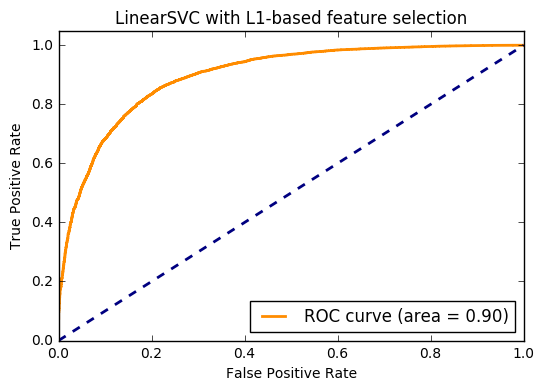

In [18]:
print('=' * 80)
title = "LinearSVC with L1-based feature selection"
print(title)
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(sa.classify(Pipeline([
  ('feature_selection', LinearSVC(penalty="l1", dual=False, tol=1e-3)),
  ('classification', LinearSVC())
]), X_train, X_test, y_train, y_test, title, FALSE))

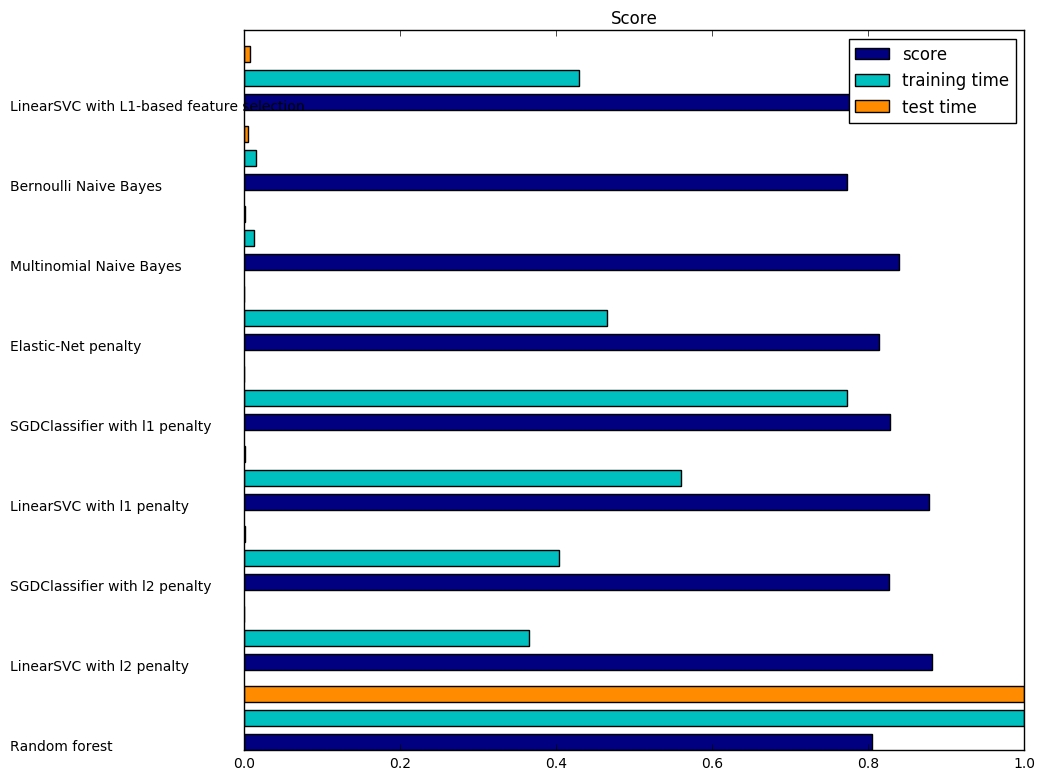

In [19]:
sa.plot_results(results)

## Step 4: Fit Models using Cross Validation 
Fit different classification models using cross validation and evaluate


### MultinomialNB Unigram

In [20]:
pipeline = Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('classifier',       MultinomialNB())])

In [21]:
sa.kFold_cross_val(df, pipeline)

Total reviews classified: 64706
Score: 0.883388195728
Confusion matrix:
[[ 6877  5713]
 [ 5965 46151]]


### MultinomialNB Bigram and Unigram

In [22]:
pipeline = Pipeline([
        ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('classifier',       MultinomialNB())])

In [23]:
sa.kFold_cross_val(df, pipeline)

Total reviews classified: 64706
Score: 0.895055612371
Confusion matrix:
[[  682 11908]
 [   92 52024]]


### MultinomialNB using TF-IDF

In [24]:
pipeline = Pipeline([
        ('count_vectorizer',   CountVectorizer(ngram_range=(1,  2))),
        ('tfidf_transformer',  TfidfTransformer()),
        ('classifier',         MultinomialNB())])

In [25]:
sa.kFold_cross_val(df, pipeline)

Total reviews classified: 64706
Score: 0.890724800719
Confusion matrix:
[[    0 12590]
 [    0 52116]]


### BernouliNB Bigram and Unigram

In [26]:
pipeline = Pipeline([
        ('count_vectorizer',   CountVectorizer(ngram_range=(1, 2))),
        ('classifier',         BernoulliNB(binarize=0.0)) ])

In [27]:
sa.kFold_cross_val(df, pipeline)

Total reviews classified: 64706
Score: 0.89144528396
Confusion matrix:
[[  172 12418]
 [   58 52058]]


## Challenges:
** - Grid search for large datasets took long time (> 3hrs) **

## Conclusion:
**- Cross validation methods gave better performance (6% more accuracy) than traditional hyper-param tunning methods. The reason for this is due to class imbalance in data **